# Business Objective

A combined-cycle power plant comprises gas turbines, steam turbines, and heat recovery steam generators. In this type of plant, the electricity is generated by gas and steam turbines combined in one cycle. Then, it is transferred from one turbine to another. We have to model the energy generated as a function of exhaust vacuum and ambient variables and use that model to improve the plant's performance.

In [45]:
#Import Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Import Dataset
raw=pd.read_csv('Copy of energy_production (1).csv')

In [47]:
#Showing first 5 rows of data
raw.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


# Exploratory Data Analysis (EDA)

In [48]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [49]:
# Statistically summary of data
raw.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


* temperature, in the range 1.81°C - 37.11°C .
*exhaust_vacuum, in the range 25.36 Hg - 81.56 cm Hg.
*amb_pressure (Ambient pressure), in the range  992.89 milibar -1033.30  millibar.
*r_humidity (Relative humidity), in the range 25.56% to 100.16% .
*energy_production, in the range 420.26 - 495.76  MW, net hourly electrical energy output.

In [50]:
# Number of rows and columns
raw.shape

(9568, 5)

In [51]:
#Checking for null values
raw.isnull().any()

temperature          False
exhaust_vacuum       False
amb_pressure         False
r_humidity           False
energy_production    False
dtype: bool

In [53]:
# checking Duplicate values 
raw[raw.duplicated()].shape

(41, 5)

In [54]:
# showing duplicated values
raw[raw.duplicated()] 

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
2066,10.72,41.17,1019.68,60.71,479.21
2780,28.41,75.60,1018.48,56.07,440.28
3333,24.79,75.60,1017.07,68.23,440.05
3467,7.64,41.17,1020.01,75.14,488.53
3550,25.42,75.60,1017.39,77.63,438.24
3747,11.61,41.17,1019.57,58.82,476.81
4292,12.27,41.17,1019.41,58.10,475.13
4528,24.63,59.57,1010.45,85.36,440.67
5065,8.57,41.17,1020.18,72.47,484.20
5564,11.82,41.17,1019.50,55.74,475.61


In [56]:
# Clean Duplicated values 
raw_cleaned=raw.drop_duplicates().reset_index(drop=True)
raw_cleaned.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [57]:
#No duplicated data shape
raw_cleaned.shape

(9527, 5)

In [58]:
raw_cleaned.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9527.000000,9527.000000,9527.000000,9527.000000,9527.00000
mean,19.658225,54.293421,1013.237084,73.334951,454.33591
std,7.444397,12.686309,5.940526,14.607513,17.03908
min,1.810000,25.360000,992.890000,25.560000,420.26000
25%,13.530000,41.740000,1009.085000,63.375000,439.75000
50%,20.350000,52.080000,1012.920000,75.000000,451.52000
75%,25.710000,66.510000,1017.200000,84.850000,468.36500
max,37.110000,81.560000,1033.300000,100.160000,495.76000


# Data Visualization

In [59]:
raw_cleaned.columns

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')

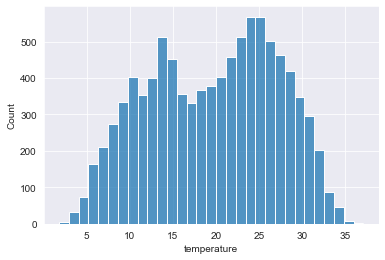

In [60]:
# checking data Distribution
sns.histplot(raw_cleaned['temperature'])
plt.show()

In [61]:
raw_cleaned['temperature'].skew()

-0.1361069178515444

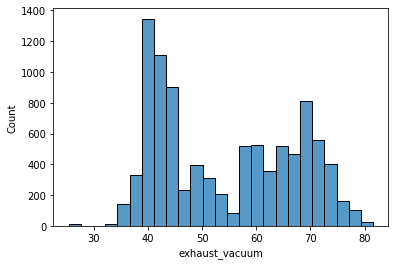

In [16]:
sns.histplot(pd_cleaned['exhaust_vacuum'])
plt.show()

In [62]:
raw_cleaned['exhaust_vacuum'].skew()

0.1968187812768364

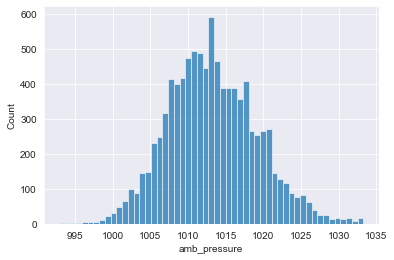

In [63]:
sns.histplot(raw_cleaned['amb_pressure'])
plt.show()

In [64]:
raw_cleaned['amb_pressure'].skew()

0.273845628693525

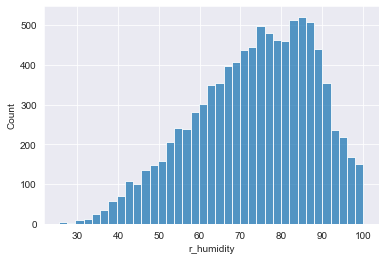

In [65]:
sns.histplot(raw_cleaned['r_humidity'])
plt.show()

In [66]:
raw_cleaned['r_humidity'].skew()

-0.43513848893895307

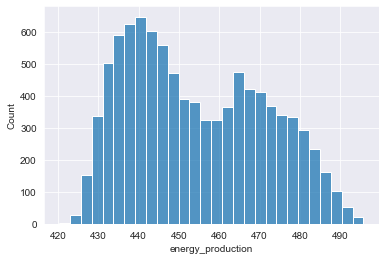

In [67]:
sns.histplot(raw_cleaned['energy_production'])
plt.show()

In [68]:
raw_cleaned['energy_production'].skew()

0.3057905126118896

* Temperature is more normally distributed
* exhaust_vacuum is less normally distributed
* amb_pressure is normally distrubuted
* r_humidity is left skewed,normally distributed
* energy_Production It has 2 peaks with normally distributed plot

# Checking Outlier

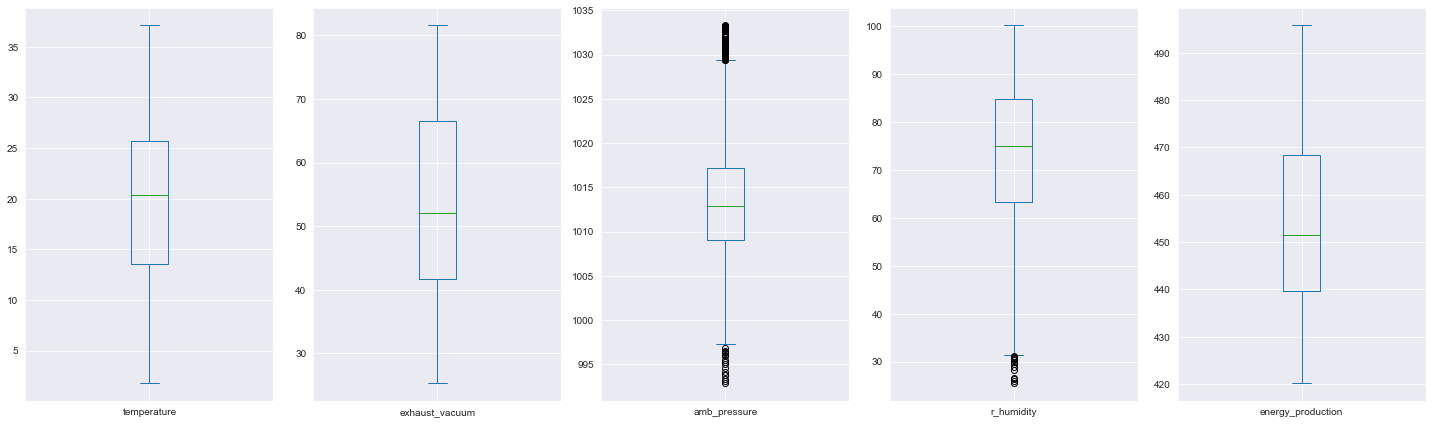

In [69]:
raw_cleaned.plot(kind='box', subplots=True, figsize=(20,6))
plt.tight_layout()

* we can say that Ambient Pressure and Relative Humidity has some outliers

In [70]:
#outlier remove
raw_cleaned.drop(raw_cleaned.index[raw_cleaned['amb_pressure']>1029], inplace=True)
raw_cleaned.drop(raw_cleaned.index[raw_cleaned['amb_pressure']<997], inplace=True)
raw_cleaned.drop(raw_cleaned.index[raw_cleaned['r_humidity']<31], inplace=True)

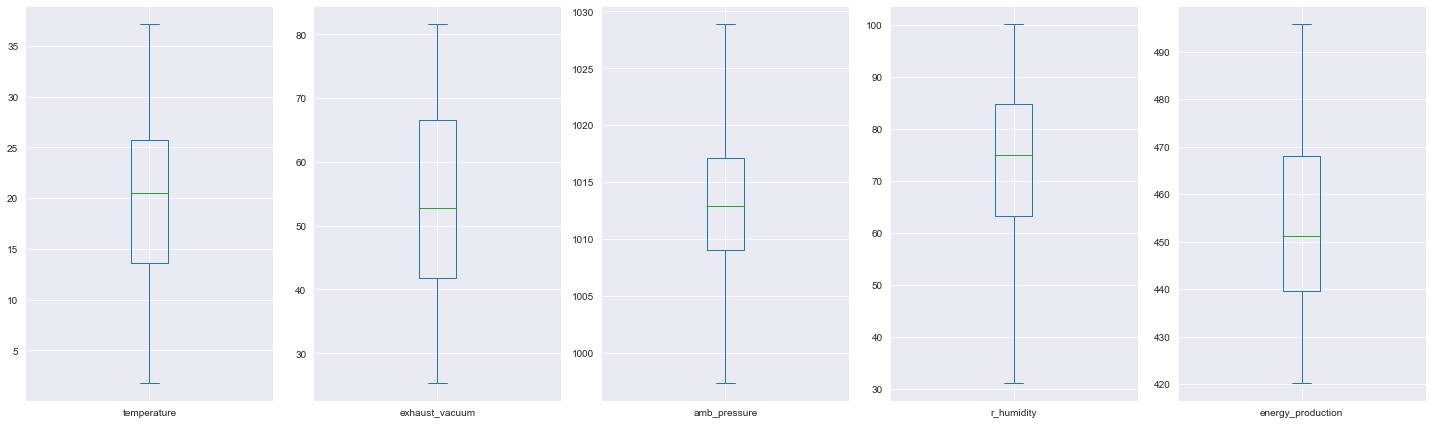

In [71]:
raw_cleaned.plot(kind='box', subplots=True, figsize=(20,6))
plt.tight_layout()

* No outliers in dataset

In [72]:
raw_cleaned.shape

(9416, 5)

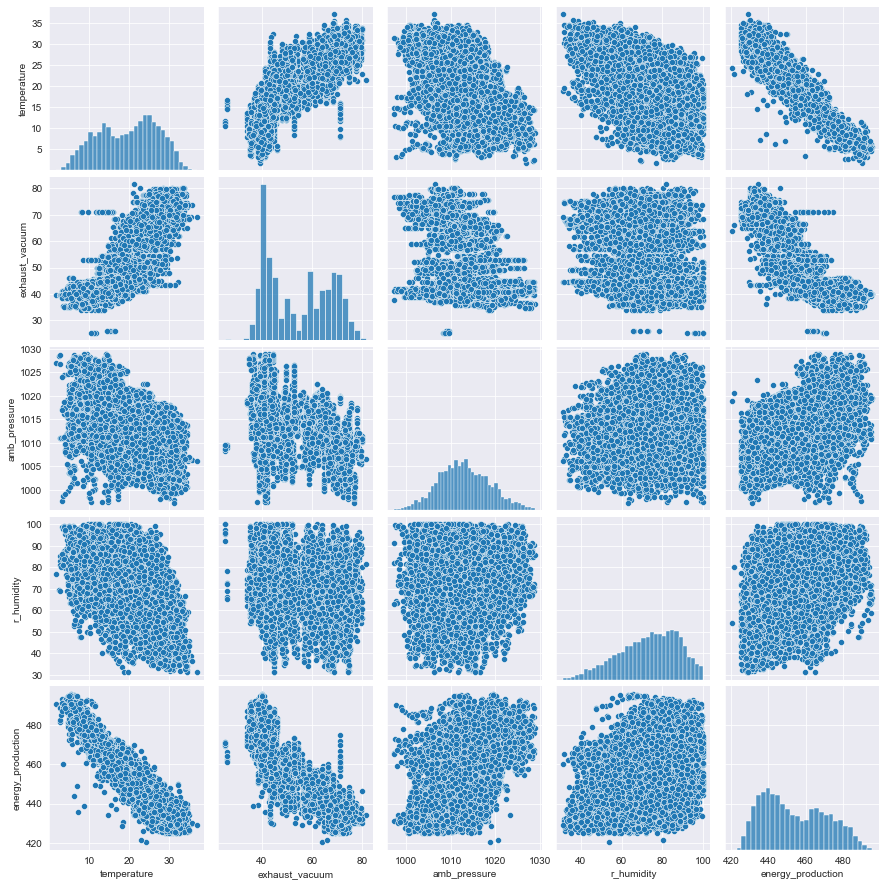

In [73]:
sns.set_style(style='darkgrid')
sns.pairplot(raw_cleaned)

# Checking Correlation

In [74]:
corr_matrix=raw_cleaned.corr()
corr_matrix

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.842231,-0.509005,-0.543672,-0.947242
exhaust_vacuum,0.842231,1.000000,-0.417355,-0.310233,-0.868760
amb_pressure,-0.509005,-0.417355,1.000000,0.107419,0.521276
r_humidity,-0.543672,-0.310233,0.107419,1.000000,0.389424
energy_production,-0.947242,-0.868760,0.521276,0.389424,1.000000


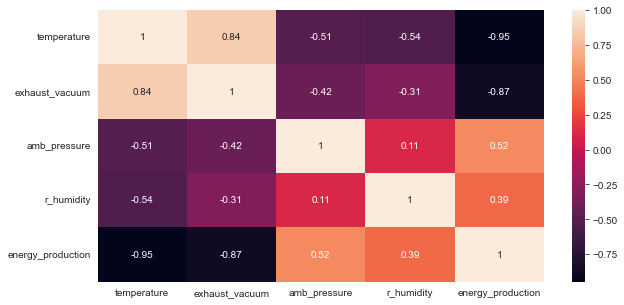

In [75]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix,annot=True)
plt.show()

* we observed co relation matrix and heatmap, temperature and exhaust_vacuum have strong negative co relation.with the output variable Energy_production
* The amb_pressure and r_humidity weak positive co relationwith output variable energy_production

# Checking missing values

In [76]:
!pip install klib
import klib

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
klib.missingval_plot(raw_cleaned)

No missing values found in the dataset.


# Distribution plot

<Axes: xlabel='temperature', ylabel='Density'>

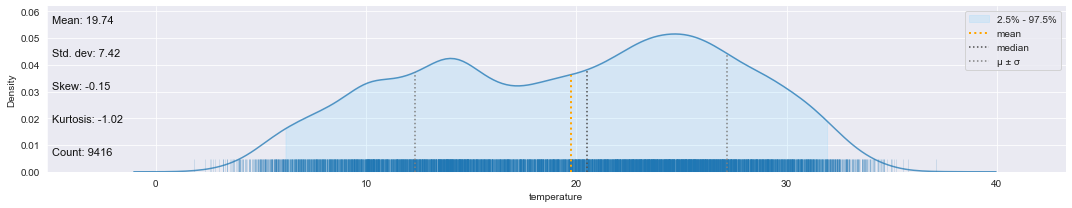

In [78]:
klib.dist_plot(raw_cleaned)

# Checking Correlation

In [79]:
#correlation matrix
klib.corr_mat(raw_cleaned)

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.00,0.84,-0.51,-0.54,-0.95
exhaust_vacuum,0.84,1.00,-0.42,-0.31,-0.87
amb_pressure,-0.51,-0.42,1.00,0.11,0.52
r_humidity,-0.54,-0.31,0.11,1.00,0.39
energy_production,-0.95,-0.87,0.52,0.39,1.00


Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

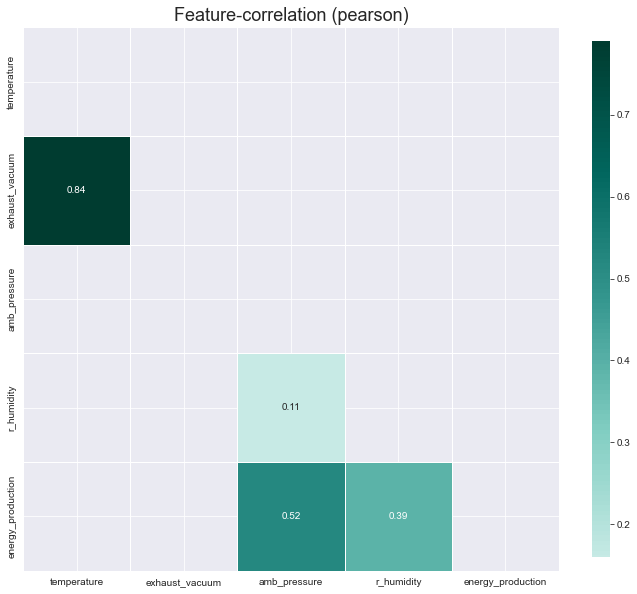

In [80]:
# Checking positive Correlation 
klib.corr_plot(raw_cleaned,split="pos")

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

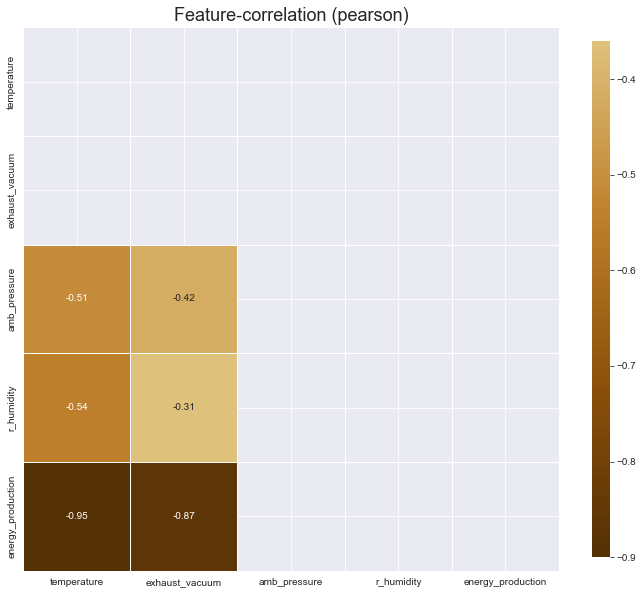

In [81]:
# checking negative Correlation
klib.corr_plot(raw_cleaned,split="neg")

<Axes: title={'center': 'Feature-correlation (pearson)'}>

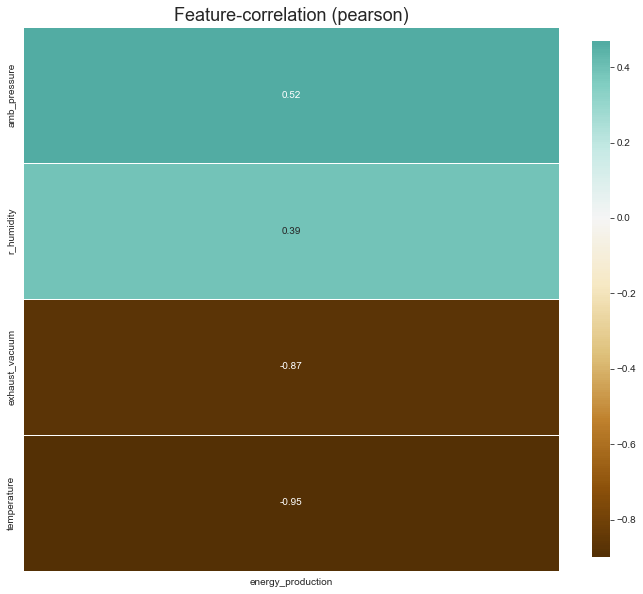

In [82]:
# correlation with a target variable
klib.corr_plot(raw_cleaned,target='energy_production')

* we observed co relation plot and heatmap, temperature and exhaust_vacuum have strong negative co relation.with the target variable Energy_production.
* the amb_pressure and r_humidity weak positive co relationwith target variable energy_production.

In [83]:
from sklearn import preprocessing

In [84]:
#normalizing the data:
data_norm=preprocessing.normalize(raw_cleaned)
print(data_norm)

[[0.0085059  0.03420099 0.90204217 0.053306   0.42689147]
 [0.01069519 0.03761084 0.90582255 0.08409585 0.4133817 ]
 [0.01228345 0.03992343 0.90723954 0.07234572 0.41223508]
 ...
 [0.02776475 0.0512973  0.91684797 0.0512973  0.39160707]
 [0.02073247 0.05953824 0.91998976 0.07237434 0.38000811]
 [0.01584166 0.04395503 0.91110523 0.05682471 0.40555544]]


In [85]:
data_norm=pd.DataFrame(data_norm)
print(data_norm)

             0         1         2         3         4
0     0.008506  0.034201  0.902042  0.053306  0.426891
1     0.010695  0.037611  0.905823  0.084096  0.413382
2     0.012283  0.039923  0.907240  0.072346  0.412235
3     0.012205  0.048305  0.905506  0.070349  0.415484
4     0.013427  0.044025  0.907975  0.066516  0.411142
...        ...       ...       ...       ...       ...
9411  0.015421  0.044810  0.906771  0.073784  0.412404
9412  0.022222  0.058713  0.912432  0.047445  0.401592
9413  0.027765  0.051297  0.916848  0.051297  0.391607
9414  0.020732  0.059538  0.919990  0.072374  0.380008
9415  0.015842  0.043955  0.911105  0.056825  0.405555

[9416 rows x 5 columns]


,0,1,2,3,4
0,1.000000,0.851161,0.941456,-0.509108,-0.932302
1,0.851161,1.000000,0.827240,-0.283571,-0.879679
2,0.941456,0.827240,1.000000,-0.488616,-0.983694
3,-0.509108,-0.283571,-0.488616,1.000000,0.343622
4,-0.932302,-0.879679,-0.983694,0.343622,1.000000


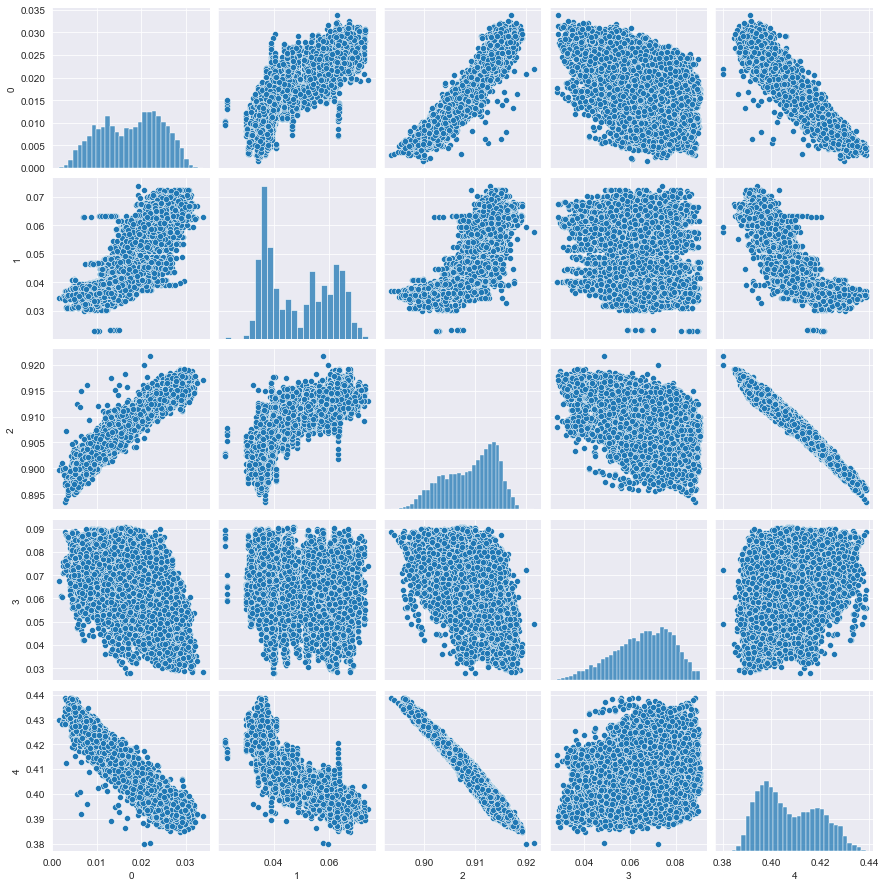

In [86]:
sns.pairplot(data_norm)
data_norm.corr()

In [88]:
data_norm.columns = raw.columns
data_norm.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,0.008506,0.034201,0.902042,0.053306,0.426891
1,0.010695,0.037611,0.905823,0.084096,0.413382
2,0.012283,0.039923,0.907240,0.072346,0.412235
3,0.012205,0.048305,0.905506,0.070349,0.415484
4,0.013427,0.044025,0.907975,0.066516,0.411142


In [89]:
x=data_norm.iloc[:,0:4] #feature Matrix
y=data_norm.iloc[:,4]

In [90]:
x

,temperature,exhaust_vacuum,amb_pressure,r_humidity
0,0.008506,0.034201,0.902042,0.053306
1,0.010695,0.037611,0.905823,0.084096
2,0.012283,0.039923,0.907240,0.072346
3,0.012205,0.048305,0.905506,0.070349
4,0.013427,0.044025,0.907975,0.066516
...,...,...,...,...
9411,0.015421,0.044810,0.906771,0.073784
9412,0.022222,0.058713,0.912432,0.047445
9413,0.027765,0.051297,0.916848,0.051297
9414,0.020732,0.059538,0.919990,0.072374


In [91]:
y

0       0.426891
1       0.413382
2       0.412235
3       0.415484
4       0.411142
          ...   
9411    0.412404
9412    0.401592
9413    0.391607
9414    0.380008
9415    0.405555
Name: energy_production, Length: 9416, dtype: float64

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
#splitting the data set
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(7532, 4)
(1884, 4)


In [94]:
print(y_train.shape)
print(y_test.shape)

(7532,)
(1884,)


# Random Forest

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
reg_model = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [97]:
reg_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [98]:
y_pred = reg_model.predict(X_test)

In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
random_rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [101]:
print(random_rmse)

0.00034964977049560856


In [102]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.00023095586984932226
MSE: 1.2225496200763174e-07
RMSE: 0.00034964977049560856


In [103]:
#Evaluation of  the explained variance score (R^2)
metrics.explained_variance_score(y_test,y_pred) 

0.9991485762294167

# KNN Model

In [104]:
from sklearn.neighbors import KNeighborsRegressor

In [105]:
knn_model = KNeighborsRegressor(n_neighbors=3)

In [106]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [107]:
y_pred= knn_model.predict(X_test)

In [108]:
KNN_rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [109]:
print(KNN_rmse)

0.0011559994652899082


In [110]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.000843100591822832
MSE: 1.3363347637505534e-06
RMSE: 0.0011559994652899082


In [111]:
#Evaluation of  the explained variance score (R^2)
metrics.explained_variance_score(y_test,y_pred) 

0.9907075803380982

# Bagging meta Estimator

In [112]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree

In [113]:
bag_model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
bag_model.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=1))

In [114]:
y_pred= bag_model.predict(X_test)

In [115]:
Bag_rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [116]:
print(Bag_rmse)

0.00033180006955445485


In [117]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.00022707365902353507
MSE: 1.1009128615634107e-07
RMSE: 0.00033180006955445485


In [118]:
#Evaluation of  the explained variance score (R^2)
metrics.explained_variance_score(y_test,y_pred) 

0.9992357332117661

# Adaboost

In [119]:
from sklearn.ensemble import AdaBoostRegressor
ada_model = AdaBoostRegressor()
ada_model.fit(X_train, y_train)

AdaBoostRegressor()

In [120]:
y_pred= ada_model.predict(X_test)

In [121]:
Ada_rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [122]:
print(Ada_rmse)

0.0015406249136965281


In [123]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.0012227380497260066
MSE: 2.373525124702435e-06
RMSE: 0.0015406249136965281


In [124]:
#Evaluation of  the explained variance score (R^2)
metrics.explained_variance_score(y_test,y_pred)

0.9834782530468564

# Gradient Boosting

In [126]:
from sklearn.ensemble import GradientBoostingRegressor
gbm_model= GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [127]:
y_pred= gbm_model.predict(X_test)

In [128]:
gbm_rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [129]:
print(gbm_rmse)

0.00042691499440314677


In [130]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.0003096020771061562
MSE: 1.8225641244623882e-07
RMSE: 0.00042691499440314677


In [131]:
#Evaluation of  the explained variance score (R^2)
metrics.explained_variance_score(y_test,y_pred) 

0.9987301293896422

In [132]:
Result=pd.DataFrame({"Model":["Random Forest","KNN","Bagging","Adaboost","GBM"],"RMSE":[random_rmse,KNN_rmse,Bag_rmse,Ada_rmse,gbm_rmse]})

In [133]:
Result=Result.sort_values(by='RMSE')

In [134]:
Result=Result.reset_index(drop=True)

In [135]:
Result

,Model,RMSE
0,Bagging,0.000332
1,Random Forest,0.000350
2,GBM,0.000427
3,KNN,0.001156
4,Adaboost,0.001541


* select the final model Bagging the RMSE value is good compare to other